Primeras 5 filas:


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



Descripción estadística de los atributos (describe):


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



Rangos (min, max) de los atributos predictores:


,min,max
Alcohol,11.03,14.83
Malic_acid,0.74,5.80
Ash,1.36,3.23
Alcalinity_of_ash,10.60,30.00
Magnesium,70.00,162.00
Total_phenols,0.98,3.88
Flavanoids,0.34,5.08
Nonflavanoid_phenols,0.13,0.66
Proanthocyanins,0.41,3.58
Color_intensity,1.28,13.00



Resultados ejemplo (k=5):
 Sin normalizar -> Train acc: 0.8065, Val acc: 0.7222
 Normalizado  -> Train acc: 0.9839, Val acc: 0.9444


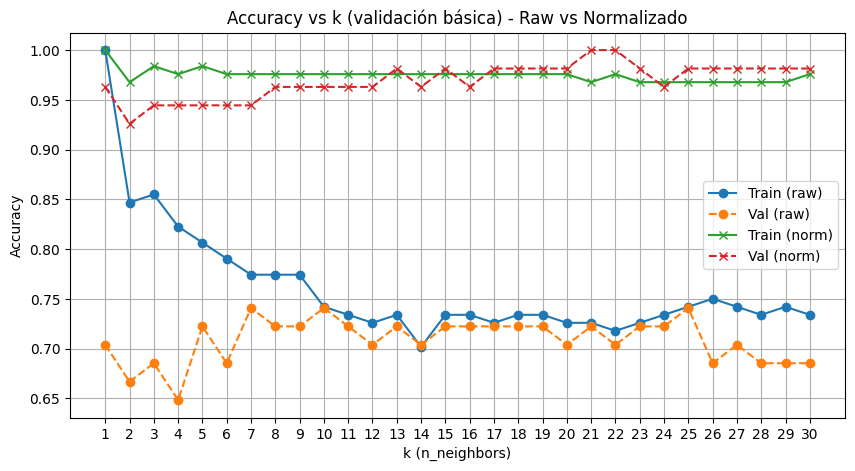

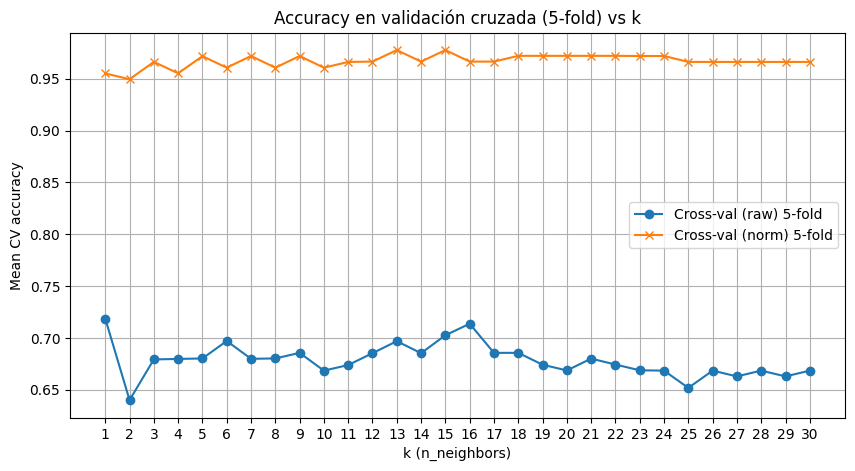

Mejor k (por CV) sin normalizar: k=1 -> acc=0.7186
Mejor k (por CV) normalizado:    k=13 -> acc=0.9776

Modelo final (normalizado) con k=13: Accuracy en split de validación = 0.9630


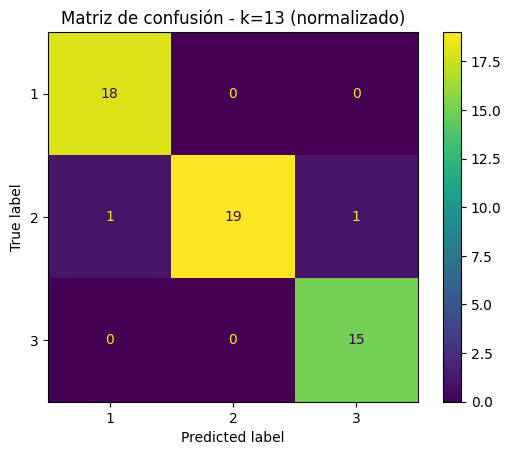

In [1]:
# -*- coding: utf-8 -*-
# Notebook: Actividad 2.16 - k-NN sobre Wine dataset (UCI)
# Pegar y ejecutar en Google Colab

# 1) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# 2) Cargar el dataset desde UCI (archivo .data)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Columnas según la descripción del dataset
cols = [
    "Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
    "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
    "Color_intensity", "Hue", "OD280_OD315", "Proline"
]

df = pd.read_csv(url, header=None, names=cols)

# 3) Comprobar los primeros registros y df.describe()
print("Primeras 5 filas:")
display(df.head())
print("\nDescripción estadística de los atributos (describe):")
display(df.describe())

# Mostrar rangos explícitos (min, max por atributo predictor)
predictor_cols = df.columns.drop("Class")
ranges = df[predictor_cols].agg(['min', 'max']).T
ranges.columns = ['min', 'max']
print("\nRangos (min, max) de los atributos predictores:")
display(ranges)

# 4) Preparar X, y
X = df[predictor_cols].values
y = df["Class"].values

# 5) Función para evaluar k-NN con o sin normalización (validación básica)
def evaluate_knn_basic(X, y, k=5, normalize=False, test_size=0.3, random_state=42):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    if normalize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    return accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)

# 6) Resultado ejemplo para un k elegido (ej: k=5) con y sin normalizar
k_example = 5
train_acc_raw, val_acc_raw = evaluate_knn_basic(X, y, k=k_example, normalize=False)
train_acc_norm, val_acc_norm = evaluate_knn_basic(X, y, k=k_example, normalize=True)

print(f"\nResultados ejemplo (k={k_example}):")
print(f" Sin normalizar -> Train acc: {train_acc_raw:.4f}, Val acc: {val_acc_raw:.4f}")
print(f" Normalizado  -> Train acc: {train_acc_norm:.4f}, Val acc: {val_acc_norm:.4f}")

# 7) Gráfica: tasa de aciertos (train y validation) para distintos k (validación básica)
k_values = range(1, 31)  # probar k de 1 a 30
train_scores_raw = []
val_scores_raw = []
train_scores_norm = []
val_scores_norm = []

for k in k_values:
    tr_r, val_r = evaluate_knn_basic(X, y, k=k, normalize=False)
    train_scores_raw.append(tr_r)
    val_scores_raw.append(val_r)
    tr_n, val_n = evaluate_knn_basic(X, y, k=k, normalize=True)
    train_scores_norm.append(tr_n)
    val_scores_norm.append(val_n)

plt.figure(figsize=(10, 5))
plt.plot(k_values, train_scores_raw, label="Train (raw)", linestyle='-', marker='o')
plt.plot(k_values, val_scores_raw, label="Val (raw)", linestyle='--', marker='o')
plt.plot(k_values, train_scores_norm, label="Train (norm)", linestyle='-', marker='x')
plt.plot(k_values, val_scores_norm, label="Val (norm)", linestyle='--', marker='x')
plt.xticks(k_values)
plt.xlabel("k (n_neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k (validación básica) - Raw vs Normalizado")
plt.legend()
plt.grid(True)
plt.show()

# 8) Gráfica: tasa de aciertos en validación con validación cruzada (StratifiedKFold)
def crossval_accuracy_for_ks(X, y, k_values, cv_splits=5, normalize=False, random_state=42):
    mean_scores = []
    for k in k_values:
        # Pipeline manual: si normalize, dentro del cross_val_score debemos normalizar en cada fold.
        if normalize:
            # normalizamos el conjunto completo antes de pasar a cross_val_score.
            # (Alternativa: usar Pipeline + StandardScaler para que se aplique dentro de cada fold.
            from sklearn.pipeline import make_pipeline
            pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
            scores = cross_val_score(pipeline, X, y, cv=StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state))
        else:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, X, y, cv=StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state))
        mean_scores.append(scores.mean())
    return mean_scores

k_vals = list(k_values)
cv_splits = 5

cv_scores_raw = crossval_accuracy_for_ks(X, y, k_vals, cv_splits=cv_splits, normalize=False)
cv_scores_norm = crossval_accuracy_for_ks(X, y, k_vals, cv_splits=cv_splits, normalize=True)

plt.figure(figsize=(10,5))
plt.plot(k_vals, cv_scores_raw, label=f"Cross-val (raw) {cv_splits}-fold", marker='o')
plt.plot(k_vals, cv_scores_norm, label=f"Cross-val (norm) {cv_splits}-fold", marker='x')
plt.xticks(k_vals)
plt.xlabel("k (n_neighbors)")
plt.ylabel("Mean CV accuracy")
plt.title(f"Accuracy en validación cruzada ({cv_splits}-fold) vs k")
plt.legend()
plt.grid(True)
plt.show()

# 9) Mostrar los mejores k según CV
best_k_raw = k_vals[int(np.argmax(cv_scores_raw))]
best_k_norm = k_vals[int(np.argmax(cv_scores_norm))]
print(f"Mejor k (por CV) sin normalizar: k={best_k_raw} -> acc={max(cv_scores_raw):.4f}")
print(f"Mejor k (por CV) normalizado:    k={best_k_norm} -> acc={max(cv_scores_norm):.4f}")

# 10) Entrenar y mostrar matriz final de confusión (opcional) para el mejor modelo normalizado
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_k = best_k_norm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_val_pred = knn_final.predict(X_val)
acc_final = accuracy_score(y_val, y_val_pred)
print(f"\nModelo final (normalizado) con k={best_k}: Accuracy en split de validación = {acc_final:.4f}")
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot()
plt.title(f"Matriz de confusión - k={best_k} (normalizado)")
plt.show()
